In [1]:
%%html
<h1 >Pneumoia Detection with CNN model of PulmoNet</h1>
<p style="font-weight: bold">The large number of deaths by pneumonia alarms scientists worldwide
to propose more effective and acute methods to detect pneumonia. With technology developing, more and
more measures are developed, in which radiology-based methods are most popular and useful.This coursework 
emphasises on implantation of AI technologies of computer science that are possible to impact global situations
against COVID-19 and decrease its effect.</br></br>
The goal of this work is to create diagnostic andprognostic models via
X-ray to overcome the complexity of detection to cure with COVID-19 patients suffering from pneumonia.</p>
<p style="font-weight: bold; color:green">Author: Anvar Bekmuratov
</br>Lecturer Advisor: Mr. Eugene Castro</p>

In [2]:
import numpy as np    
import pandas as pd   
from matplotlib import pyplot as plt
import cv2
import os as os
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dropout, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
import random


print("Tensorflow version is ", tf.__version__)

Tensorflow version is  2.8.0


In [3]:
%%html
<h1 >Loading and preparing data</h1>

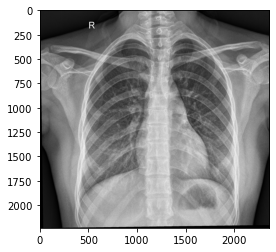

In [4]:
labels = ["NORMAL", "PNEUMONIA"]
sample_data_dir = "/Users/anvar_ghost/Downloads/chest_xray/train"#insert path of Kaggle dataset /train
#chechking if data was loaded and preproccessing it 
for label in labels:
    path = os.path.join(sample_data_dir, label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
print(img_array.shape)

(2234, 2359)


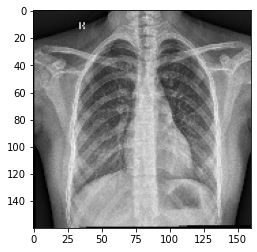

In [6]:
#checking appropiate img scan size for images
IMG_SIZE = 160
n_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(n_array, cmap="gray")
plt.show()

In [7]:
DATA = []
labels = ["NORMAL", "PNEUMONIA"]
IMG_SIZE = 160


def get_data(data_dir):
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            DATA.append([resized_array, class_num])
    return np.array(DATA)

In [8]:
train_data = get_data("/Users/anvar_ghost/Downloads/chest_xray/train")#insert path of Kaggle dataset /train
test_data = get_data("/Users/anvar_ghost/Downloads/chest_xray/test")#insert path of Kaggle dataset /test
val_data = get_data("/Users/anvar_ghost/Downloads/chest_xray/val")#insert path of Kaggle dataset /val


/var/folders/kl/zcqfzqfx4z99w0r7g7l3mxgm0000gn/T/ipykernel_97237/2512487578.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(DATA)


                                                      0  1
0     [[28, 27, 28, 29, 28, 28, 29, 28, 28, 28, 31, ...  0
1     [[109, 59, 55, 51, 44, 79, 83, 83, 89, 90, 102...  0
2     [[46, 54, 65, 75, 78, 87, 91, 95, 99, 105, 116...  0
3     [[0, 9, 14, 26, 36, 43, 50, 54, 56, 64, 69, 74...  0
4     [[114, 117, 120, 122, 128, 132, 135, 193, 175,...  0
...                                                 ... ..
5211  [[0, 0, 1, 14, 15, 11, 17, 21, 22, 23, 23, 219...  1
5212  [[39, 40, 43, 43, 49, 51, 54, 55, 55, 59, 56, ...  1
5213  [[7, 8, 10, 10, 253, 14, 15, 254, 15, 18, 19, ...  1
5214  [[39, 40, 40, 40, 40, 41, 40, 40, 42, 50, 49, ...  1
5215  [[43, 44, 50, 60, 97, 136, 117, 107, 107, 112,...  1

[5216 rows x 2 columns]


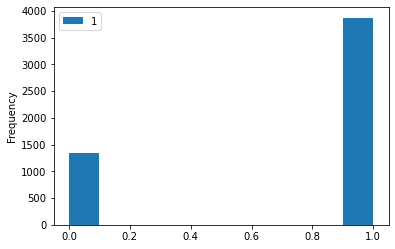

In [9]:
#checking if data was loaded and number of images
df = pd.DataFrame(train_data)
print(df)
df.plot(kind = 'hist')
plt.show()

In [10]:
random.shuffle(
    train_data
)


                                                      0  1
0     [[28, 27, 28, 29, 28, 28, 29, 28, 28, 28, 31, ...  0
1     [[109, 59, 55, 51, 44, 79, 83, 83, 89, 90, 102...  0
2     [[109, 59, 55, 51, 44, 79, 83, 83, 89, 90, 102...  0
3     [[46, 54, 65, 75, 78, 87, 91, 95, 99, 105, 116...  0
4     [[114, 117, 120, 122, 128, 132, 135, 193, 175,...  0
...                                                 ... ..
5211  [[51, 57, 62, 59, 62, 67, 66, 64, 63, 77, 112,...  1
5212  [[173, 169, 163, 148, 147, 135, 141, 128, 127,...  1
5213  [[73, 73, 79, 112, 125, 125, 120, 124, 127, 23...  1
5214  [[72, 80, 86, 85, 82, 86, 149, 121, 120, 118, ...  0
5215  [[38, 254, 49, 58, 251, 65, 60, 63, 132, 123, ...  1

[5216 rows x 2 columns]


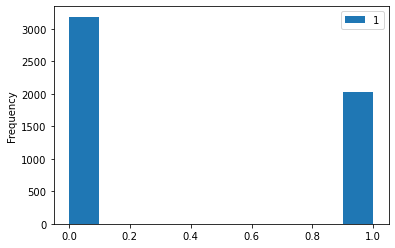

In [11]:
#checking if data was loaded and number of images
df = pd.DataFrame(train_data)
print(df) 
df.plot(kind = 'hist')

plt.show()

In [12]:
for title in train_data[-20:]:
    print(title[1])

1
0
1
0
1
1
0
1
0
0
0
1
1
1
1
1
1
1
0
1


Text(0.5, 1.0, 'NORMAL')

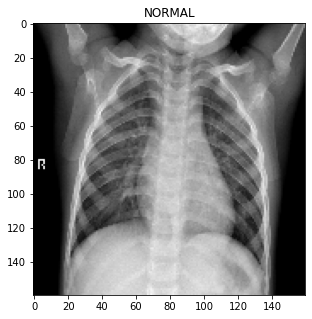

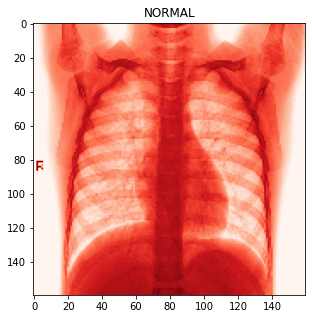

In [13]:
plt.figure(figsize = (5,5))
plt.imshow(train_data[5][0],cmap="gray")
plt.title(labels[train_data[1][1]])

plt.figure(figsize = (5,5))
plt.imshow(train_data[-10][0], cmap="Reds")
plt.title(labels[train_data[-10][1]])

In [14]:
x_train = []
y_train = []

x_test = []
y_test = []

x_val = []
y_val = []

for pneumonia, label in train_data:
    x_train.append(pneumonia)
    y_train.append(label)

for pneumonia, label in test_data:
    x_test.append(pneumonia)
    y_test.append(label)
    
for pneumonia, label in val_data:
    x_val.append(pneumonia)
    y_val.append(label)

In [15]:
x_train = np.array(x_train).astype("float32") / 255.0
x_val = np.array(x_val).astype("float32") / 255.0
x_test = np.array(x_test).astype("float32") / 255.0

In [16]:
x_train = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

x_val = x_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)


In [17]:
DATAGEN = ImageDataGenerator(
        zoom_range = 0.3, # Randomly zoom image 
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,
        rotation_range = 35,
        width_shift_range=0.3,
        vertical_flip=False,
        horizontal_flip = True)  

DATAGEN.fit(x_train)

In [18]:
df = pd.DataFrame(x_train[-10][0])
print(df)
print(y_train[-10:])

            0
0    0.000000
1    0.000000
2    0.015686
3    0.058824
4    0.121569
..        ...
155  0.505882
156  0.447059
157  0.447059
158  0.423529
159  0.274510

[160 rows x 1 columns]
[0 1 1 1 1 1 1 1 0 1]


In [19]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (IMG_SIZE,IMG_SIZE,1))) 
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 160, 160, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 80, 80, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 80, 80, 64)       2

2022-05-14 02:23:41.373685: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.add(Flatten()) #flatten 2D nodes of CNN
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(
    optimizer=keras.optimizers.RMSprop(),  
    loss= 'binary_crossentropy',
    metrics='accuracy',
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 160, 160, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 80, 80, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 80, 80, 64)       2

In [22]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                               patience=2,
                                                               verbose =1,
                                                               mode='auto',
                                                               factor=0.4,
                                                               min_lr=0.000001
                                                               )

In [49]:
PulmoNet = model.fit(DATAGEN.flow(x_train,y_train, batch_size = 32),
                    epochs = 1 ,
                    validation_data = DATAGEN.flow(x_val, y_val),
                    callbacks = [learning_rate_reduction])

163/163 [==============================] - 334s 2s/step - loss: 0.1324 - accuracy: 0.9530 - val_loss: 0.2501 - val_accuracy: 0.9344 - lr: 1.6000e-04


In [51]:
print(model.evaluate(x_test,y_test))


  7/183 [>.............................] - ETA: 1:21 - loss: 0.0196 - accuracy: 0.9911

KeyboardInterrupt: 

In [52]:
model.save('PulmoNet.h5')

model_file = "/Users/anvar_ghost/Desktop/Jupiter projects/PulmoNet.h5" #import PulmoNet path where it was saved
model = load_model(model_file)

In [55]:
predictions = model.predict(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]


KeyboardInterrupt: 